# Project: Telco Customer Churn Prediction

- Course: CS 513-A (Knowledge Discovery and Data Mining)
- Group No.: 19
- Team members: 
  1. Shiva Rama Krishna Mandadapu
  2. Hantao Gao
  3. Thanapoom Phatthanaphan

## Problem Statement
Develop a classification model to predict whether a customer will churn (leave) a telecommunications company’s service or not

## Dataset Description
The dataset contains information on telecom customers such as their demographics, usage patterns, and account information. The target variable is whether the customer churned (1) or not (0). The dataset has 7,043 observations and 20 input features.
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

**Source of dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn**

## Implementation Strategy and algorithms
Through the project, we will implement 9 different predictive models with the objective of forecasting whether a customer will churn a telecommunications company's service or not. Moreover, we will conduct a comparative analysis of the outcomes yielded by these models. The 9 selected predictive models are including:
1. Decision Trees
2. Naive Bayes Classifier
3. AdaBoost Classifier
4. Multilayer Perceptron
5. Bagging along with RandomForest
6. K-nearest neighbor with Grid SearchCV
7. Logistic Regression with Grid SearchCV
8. Random Forest with Randomized SearchCV
9. Support Vector Machine with Grid SearchCV

|Variables|Details|Data type|
|:--------|:------|:-------:|
|CustomerID|Customer ID|object|
|Gender|male/female|object|
|SeniorCitizen|Whether the customer is a senior citizen or not (1, 0)|int64|
|Partner|Whether the customer has a partner or not (Yes, No)|object|
|Dependent|Whether the customer has dependents or not (Yes, No)|object|
|tenure|Number of months the customer has stayed with the company|int64|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|Object|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|object|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|object|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|object|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|object|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|object|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|object|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|object|
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|object|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|object|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|object|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|object|
|MonthlyCharges|The amount charged to the customer monthly|float64|
|TotalCharges|The total amount charged to the customer|object|
|Churn|Whether the customer churned or not (Yes or No)|object|

## Data exploratory and analysis

**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import the dataset**

In [2]:
data = pd.read_csv("Telco_Customer_Churn_Dataset.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**Check the values of the dataset**

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Create an another data file for data analysis
analyzed_data = data.copy()

# Convert data type of the column "TotalCharges" from object to numerical type
analyzed_data['TotalCharges'] = pd.to_numeric(analyzed_data['TotalCharges'], errors='coerce')
analyzed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check the number of unique values in each column
analyzed_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

**Display the dataset by categorical values in pie chart to see the overall number of values in each column**

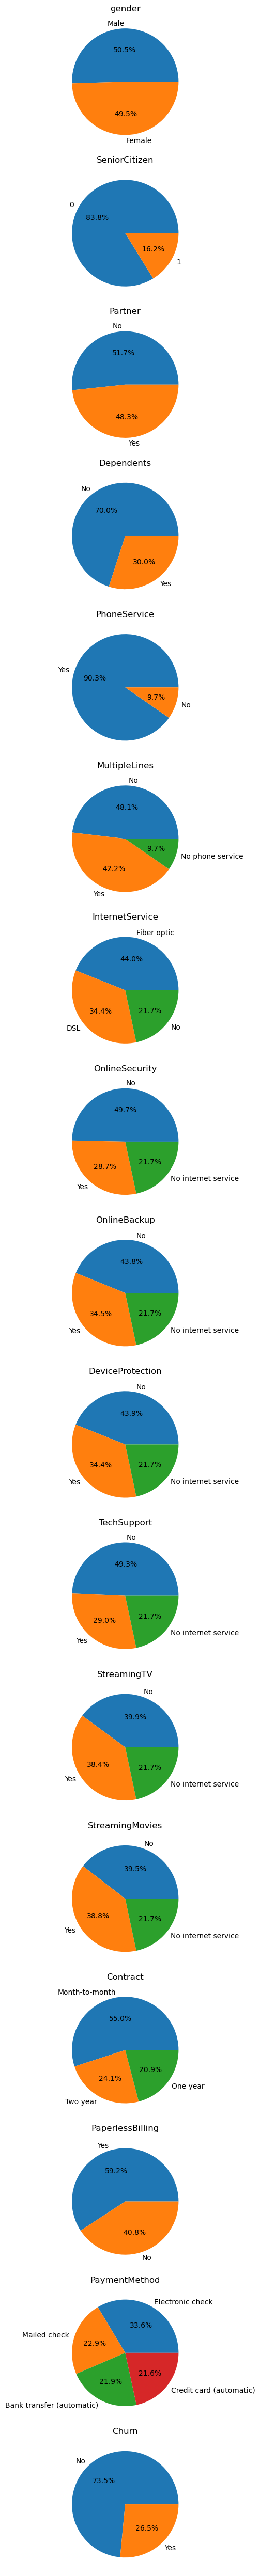

In [8]:
# Create pie chart for each column to see values in each column by categorical
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                      'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
                      'Churn']

# Set up the subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(50, 50))

# Loop through each column in the DataFrame
for i, col in enumerate(categorical_columns):
    # Create a pie chart for the column
    analyzed_data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')
    
plt.tight_layout()

**Display the relationship between each factor and churn status**

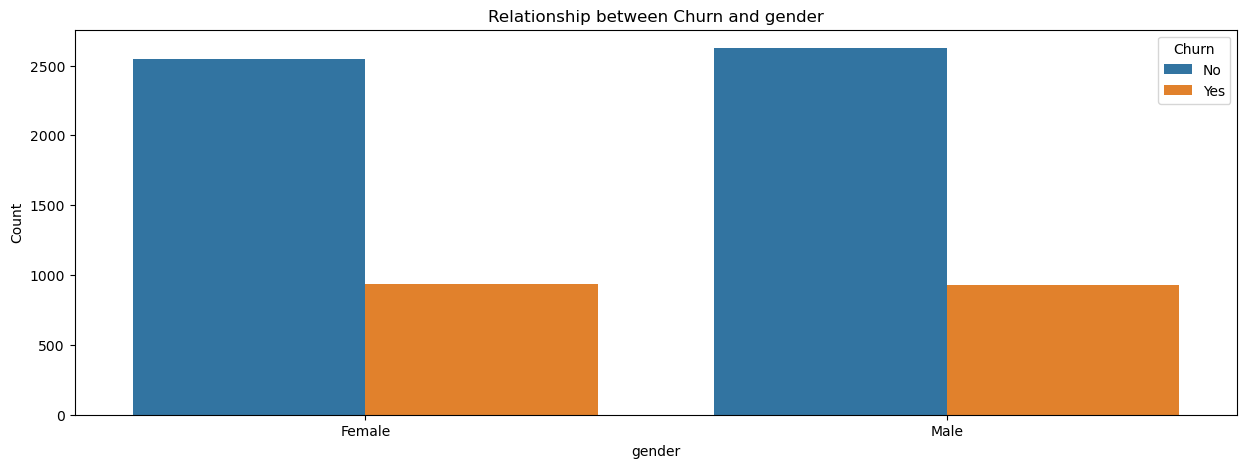

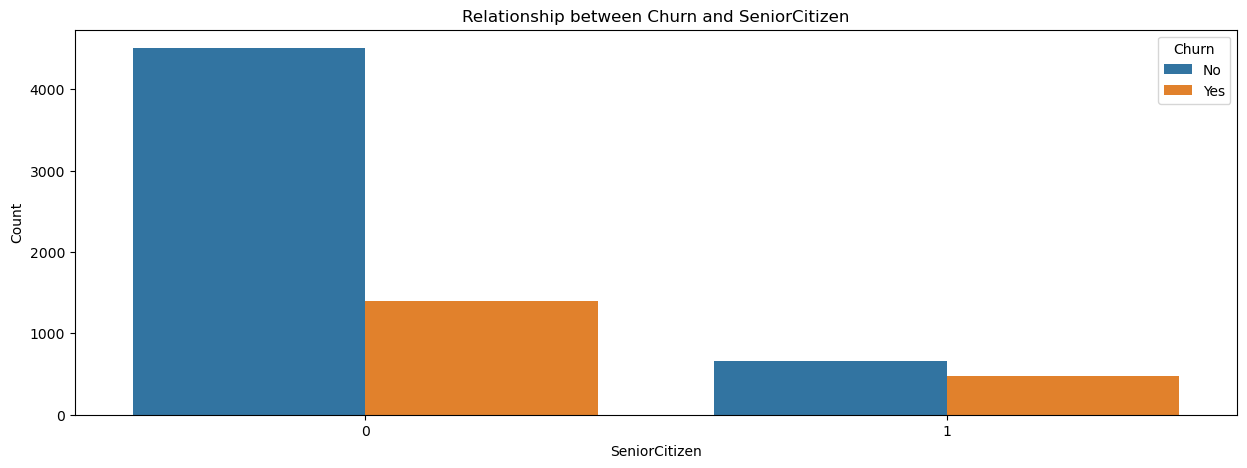

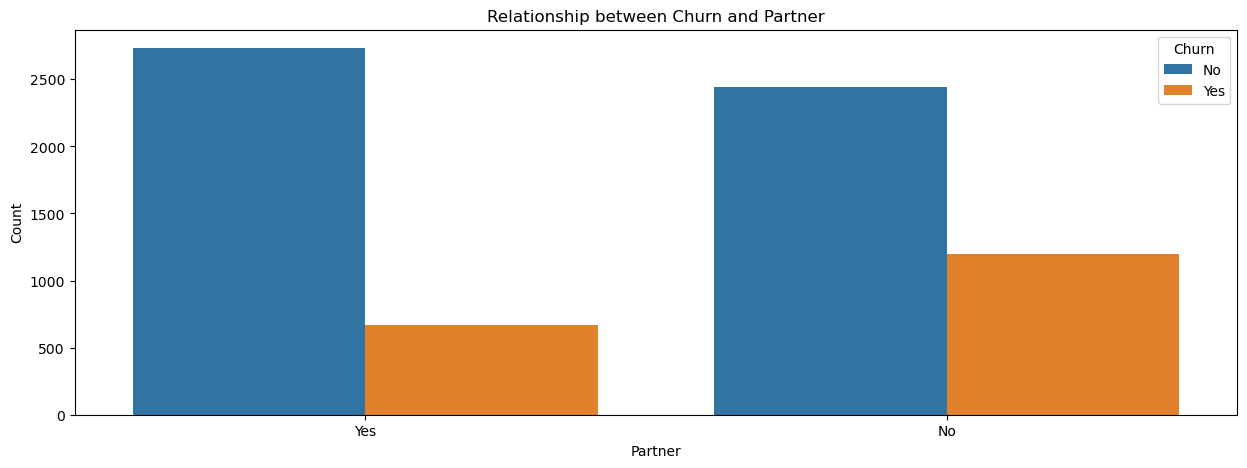

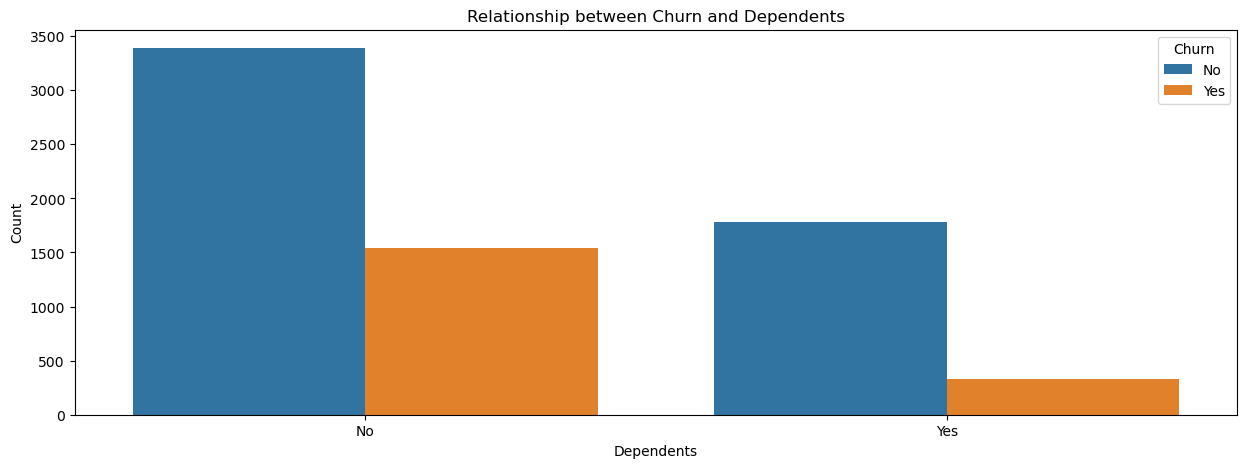

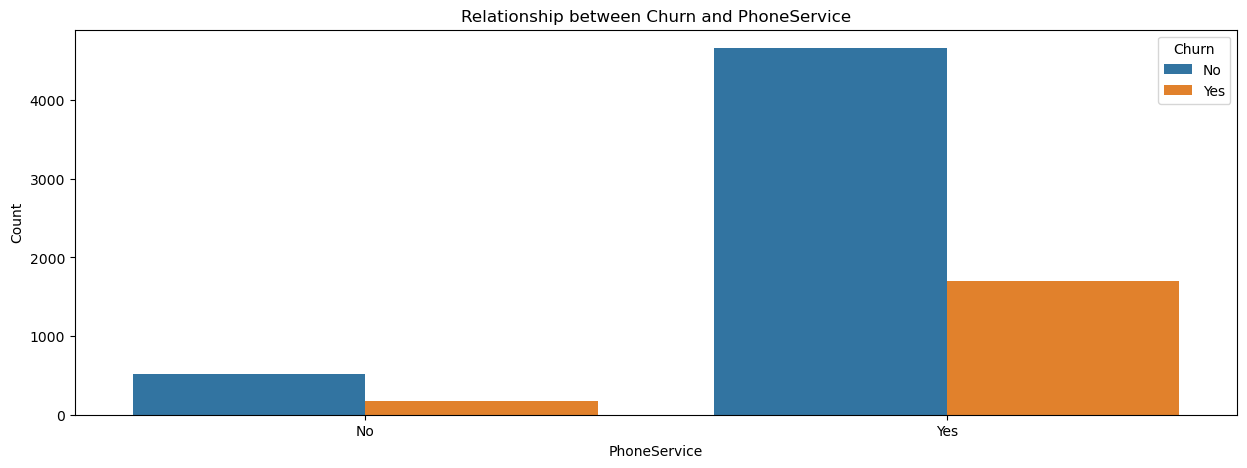

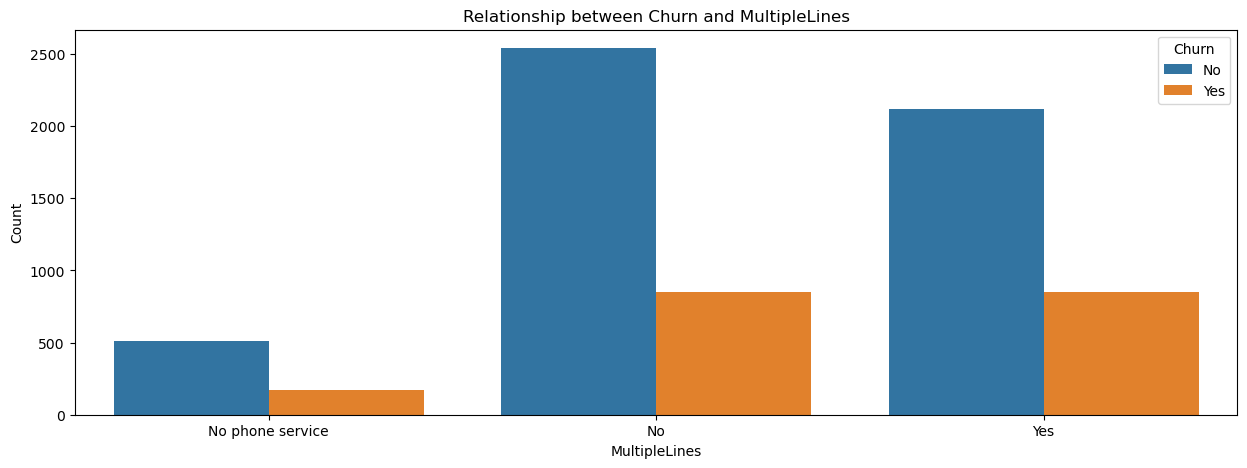

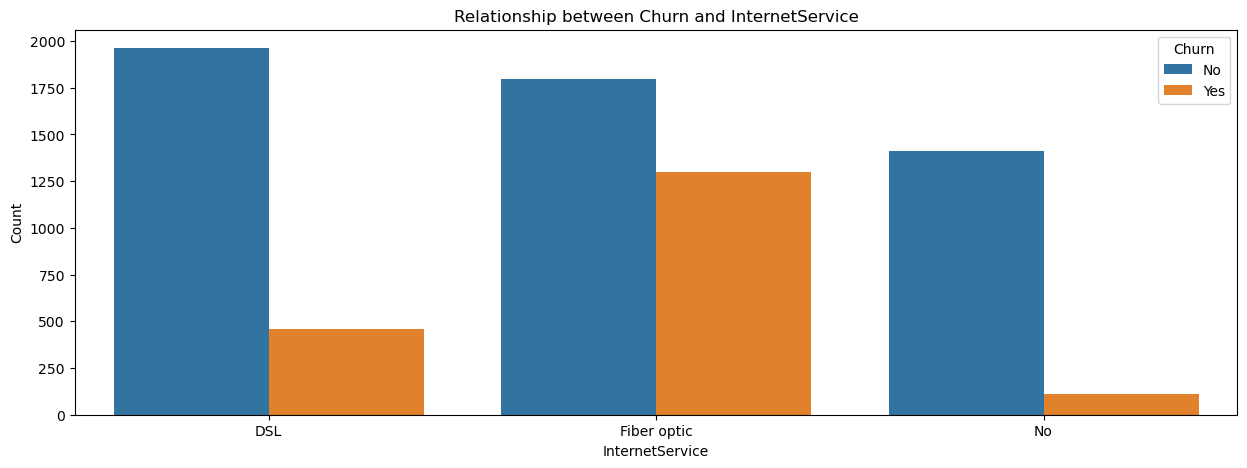

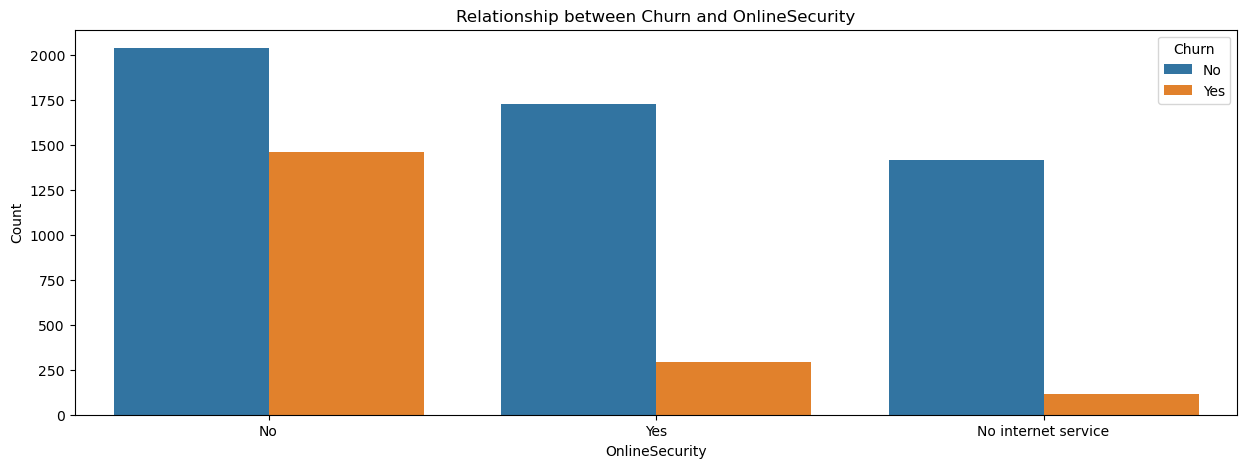

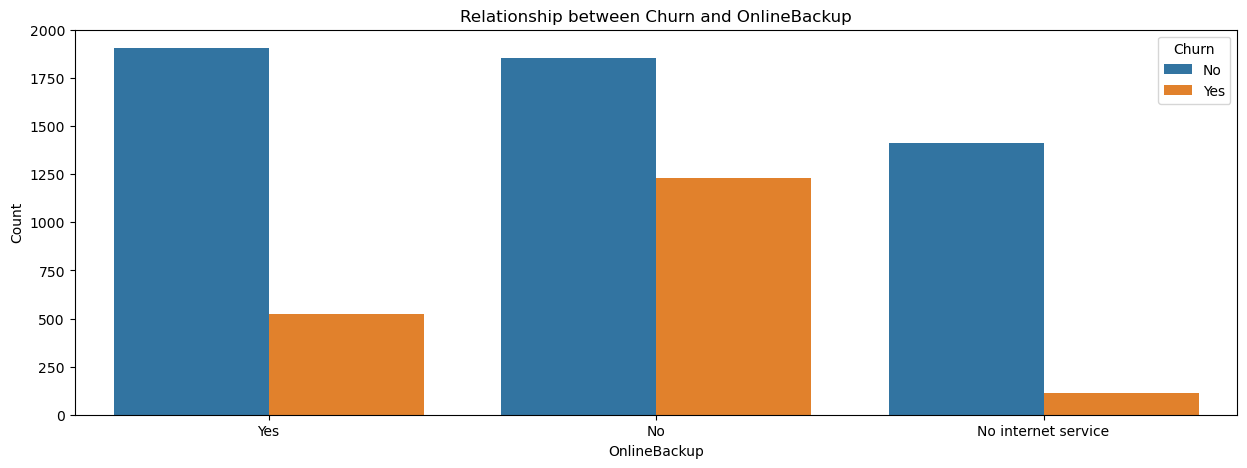

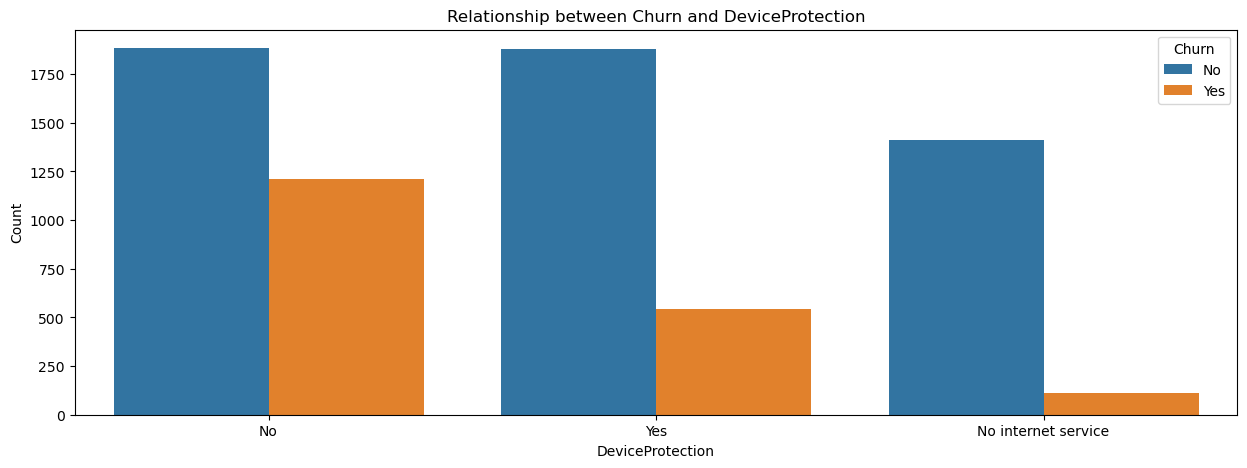

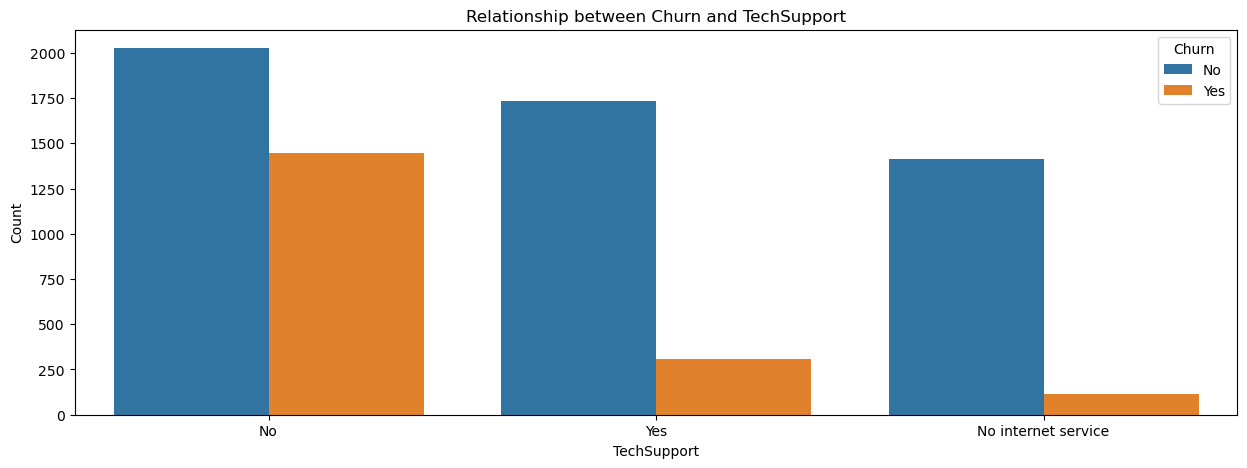

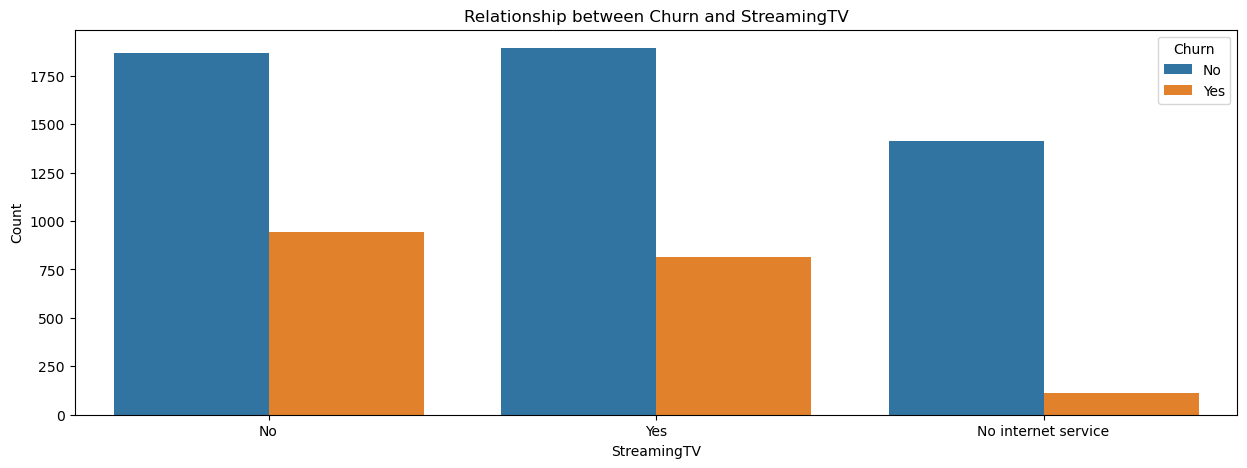

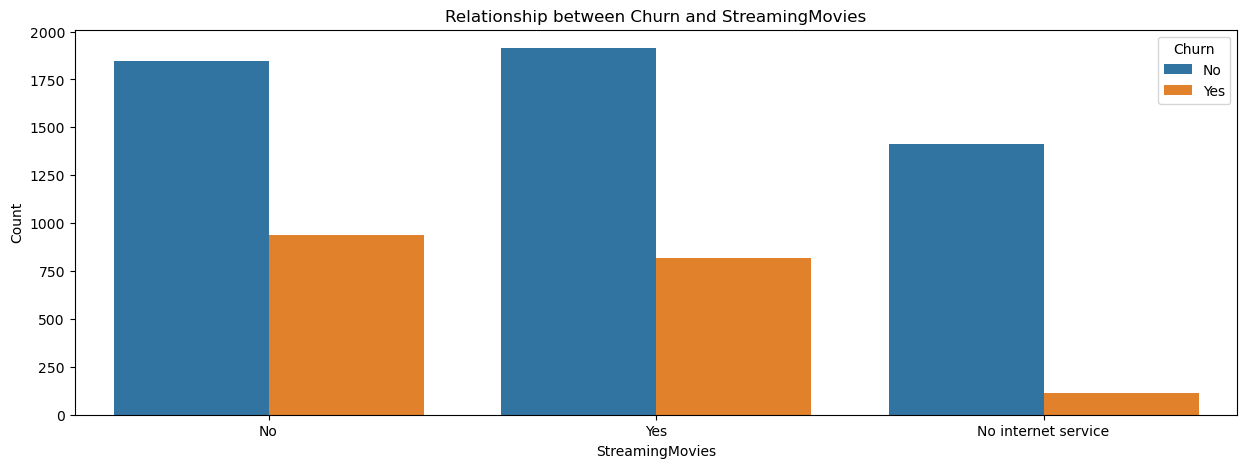

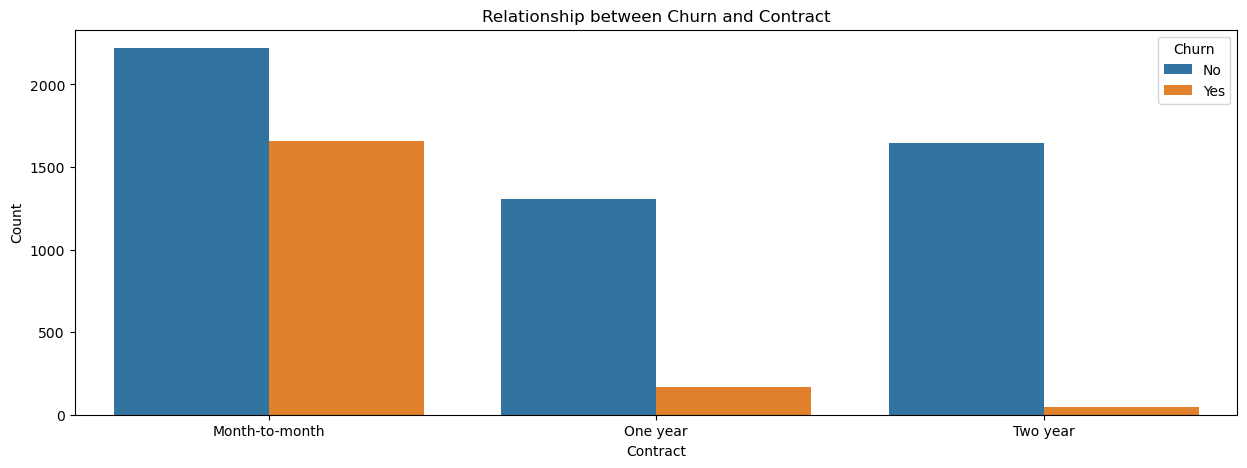

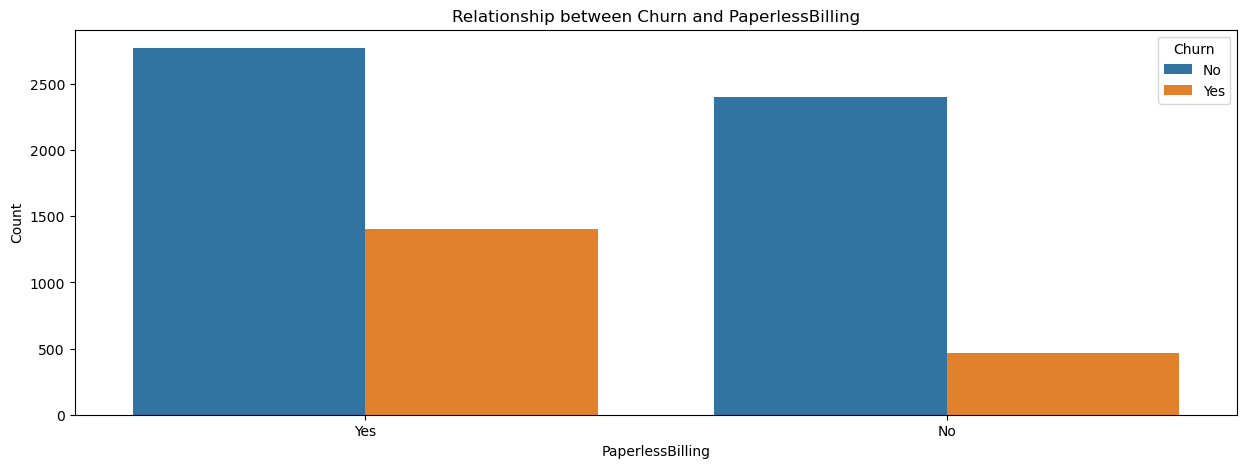

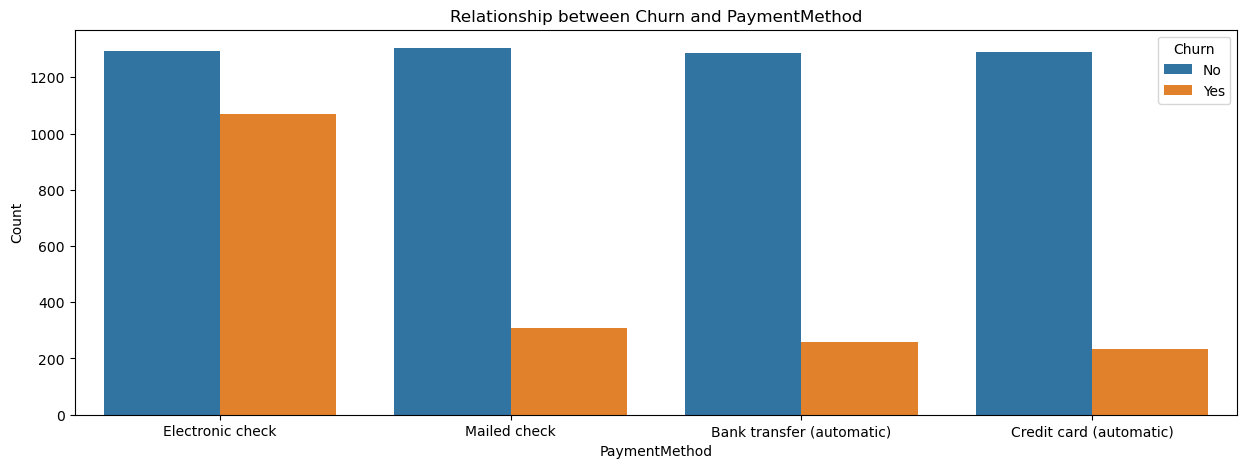

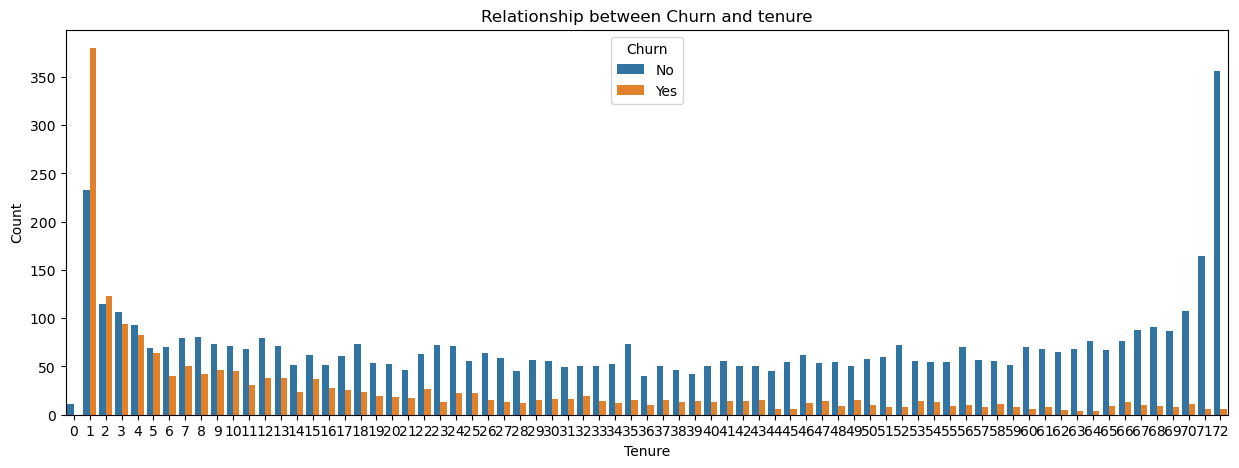

In [9]:
# Create bar chart to see the relationship between each column and "Churn" column
# Loop through each column in the dataframe
for col in categorical_columns[:-1]:
    # Create a bar chart for the column
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, hue="Churn", data=analyzed_data)
    plt.title(f"Relationship between Churn and {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

# Create bar chart for the column "tenure"
plt.figure(figsize=(15,5))
sns.countplot(x="tenure", hue="Churn", data=analyzed_data)
plt.title("Relationship between Churn and tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

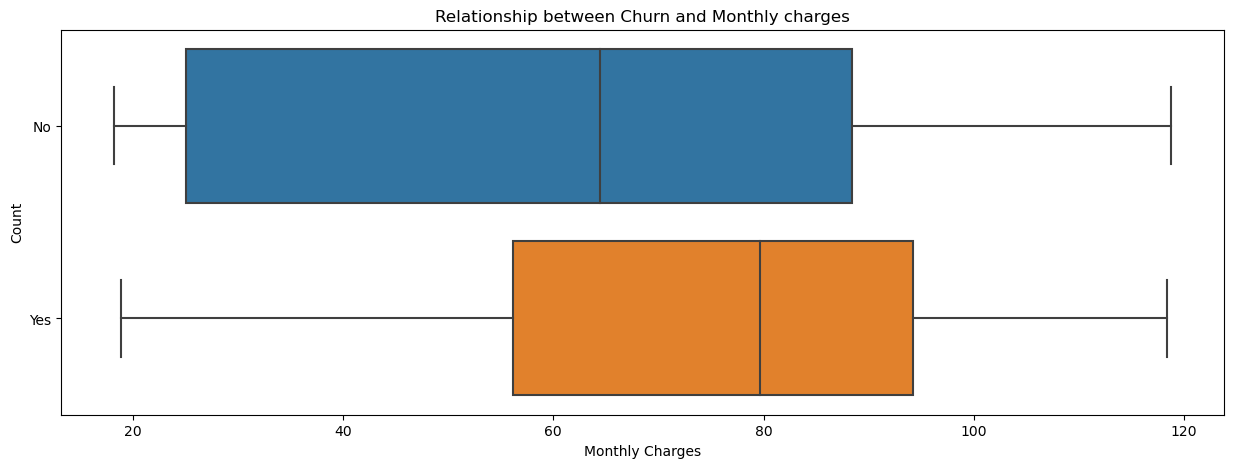

In [10]:
# Create the chart to see the relationship between Monthly charges and Churn
plt.figure(figsize=(15,5))
sns.boxplot(x="MonthlyCharges", y="Churn", data=analyzed_data)
plt.title("Relationship between Churn and Monthly charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

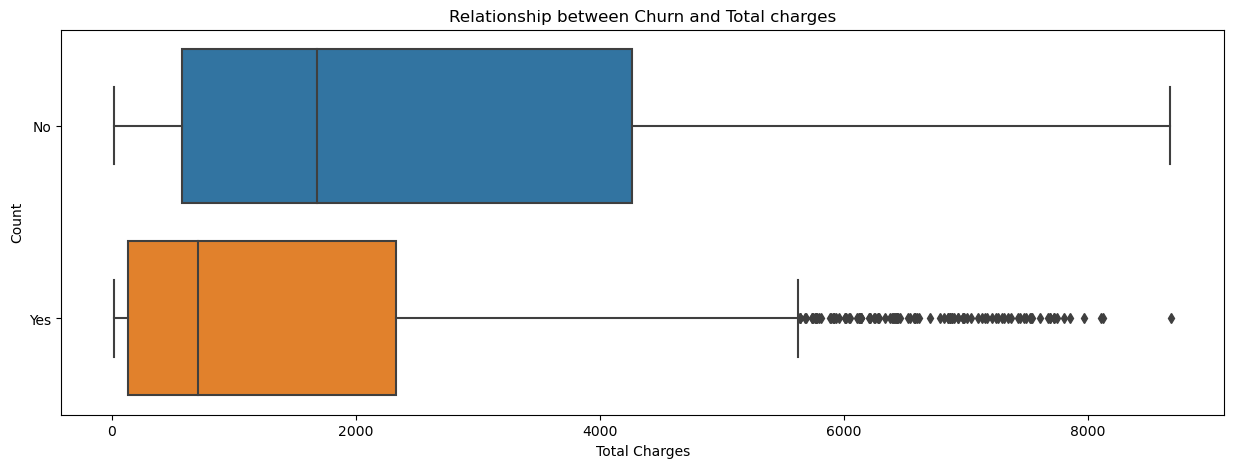

In [11]:
# Create the chart to see the relationship between Total charges and Churn
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y="Churn", data=analyzed_data)
plt.title("Relationship between Churn and Total charges")
plt.xlabel("Total Charges")
plt.ylabel("Count")
plt.show()

**The overview of the dataset**

From the above charts, we can roughly indicate most of customers who churn their services with telecommunication company as the following;
- The customer is not a senior citizen
- The customer does not have a partner
- The customer does not have dependents
- The customer uses Phone Service
- The customer uses Internet Service
- The customer uses month-to-month contract
- The customer uses Paperless Billing
- The customer uses Electronic check as payment method
- The customer is a new use with tenure less than 1 year
- The customer has monthly charges in a range from 57 to 95 dollars by approximately
- The customer has total charges in a range from 30 to 2200 dollars by approximately

In [12]:
# check missing values in each columns
analyzed_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above, we can see that the column "TotalCharges" contains missing values.

Text(0.5, 1.0, 'Distribution of the total charges')

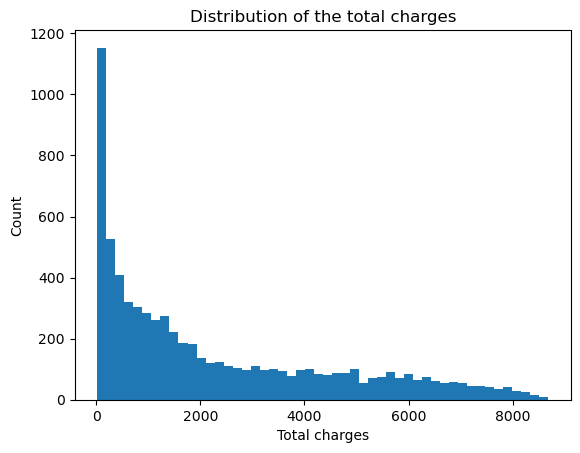

In [13]:
# Plot histogram for the data of the column "TotalCharges" to see that the data distribution is skewed or not skewed
# in order to decide that we should fill the data with mean, or median of the column.
plt.hist(x=analyzed_data["TotalCharges"], bins=50)
plt.xlabel("Total charges")
plt.ylabel("Count")
plt.title("Distribution of the total charges")

From the bar chart, we can see that the distribution of a dataset of the column "TotalCharges" is skewed, thus we fill in those missing values with the median of the column.

**Fill up the missing values with median**

In [14]:
# Fill up the missing values in the column "TotalCharges" with the median of the column
analyzed_data["TotalCharges"] = analyzed_data["TotalCharges"].fillna(analyzed_data["TotalCharges"].median())

# Recheck the missing values of every columns
analyzed_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Categorize the variables in the dataset to create new features for predictive models implementation**

**1. Tenure range**: Categorize the tenure data into 6 groups, including 0-1 year (0-12 months), 1-2 years (13-24 months), 2-3 years (25-36 months), 3-4 years (37-48 months), 4-5 years (49-60 months), and >5 years (>60 months)

**2. Total services**: Count the total services that the customer receives from the telecommunication company. Services include Phone Service, Multilines Service, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies.

**3. Security concerns**: Categorize the customer who receives both Online Security and Device Protection.

**4. Entertainment concerns**: Categorize the customer who receives both Streaming TV and Streaming Movies

**5. Technical Support for old people**: Categorize the old customer who receives technical support service.

**6. Billing and payment comfortable concerns**: Categorize the customer who selects paperless billing and electronic check as payment method.

**7. Price range**: Categorize the monthly charges into 6 groups, including 0-20 dollars, 20-40 dollars, 40-60 dollars, 60-80 dollars, 80-100 dollars, and 100-120 dollars.

In [15]:
# Create an another dataset for new features and implementing predictive models
implementing_data = analyzed_data.copy()

In [16]:
# Create new features that divides tenure by each 1 year tenure range
implementing_data['TenureRange'] = pd.cut(implementing_data['tenure'], bins=[-1,12,24,36,48,60,72], labels=['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '>5 years'])

# Create new feature that indicates the total number of services that the customer use
implementing_data["TotalServices"] = implementing_data[['PhoneService', 'InternetService', 
                                                         'OnlineSecurity', 'OnlineBackup', 
                                                         'DeviceProtection', 'TechSupport', 
                                                         'StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}).sum(axis=1)

# Create new feature that concerns about security
implementing_data["Security"] = (implementing_data["OnlineSecurity"] == 'Yes') & (implementing_data["DeviceProtection"] == 'Yes')

# Create new feature that concerns about entertainment
implementing_data["Entertainment"] = (implementing_data["StreamingTV"] == 'Yes') & (implementing_data["StreamingMovies"] == 'Yes')

# Create new feature that concerns about senior citizen that need technical support
implementing_data["SeniorTechSupport"] = (implementing_data["SeniorCitizen"] == 1) & (implementing_data["TechSupport"] == 'Yes')

# Create new feature that concerns about billing and payment method
implementing_data["BillingAndPayment"] = (implementing_data["PaperlessBilling"] == 'Yes') & (implementing_data["PaymentMethod"] == 'Electronic check')

# Create new feature that divides monthly charges by every 20 dollars range
implementing_data['MonthlyChargesRange'] = pd.cut(implementing_data['MonthlyCharges'], bins=[-1,20,40,60,80,100,120], labels=['Monthly 0-20$', 'Monthly 20-40$', 'Monthly 40-60$', 'Monthly 60-80$', 'Monthly 80-100$', 'Monthly 100-120$'])


/var/folders/bk/66r4ld3j7hj8yg_49fhv2fr40000gn/T/ipykernel_79711/2150758075.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  implementing_data["TotalServices"] = implementing_data[['PhoneService', 'InternetService',


In [17]:
implementing_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,TenureRange,TotalServices,Security,Entertainment,SeniorTechSupport,BillingAndPayment,MonthlyChargesRange
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0-1 year,1,False,False,False,True,Monthly 20-40$
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,2-3 years,3,True,False,False,False,Monthly 40-60$
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0-1 year,3,False,False,False,False,Monthly 40-60$
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,3-4 years,3,True,False,False,False,Monthly 40-60$
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,0-1 year,1,False,False,False,True,Monthly 60-80$


**Display the relationship between new features and Churn status**

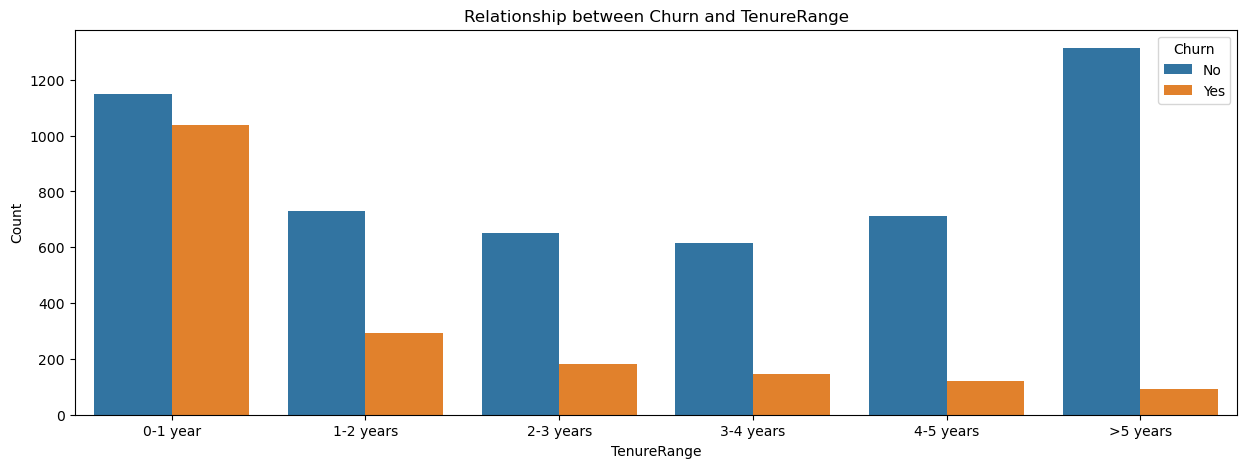

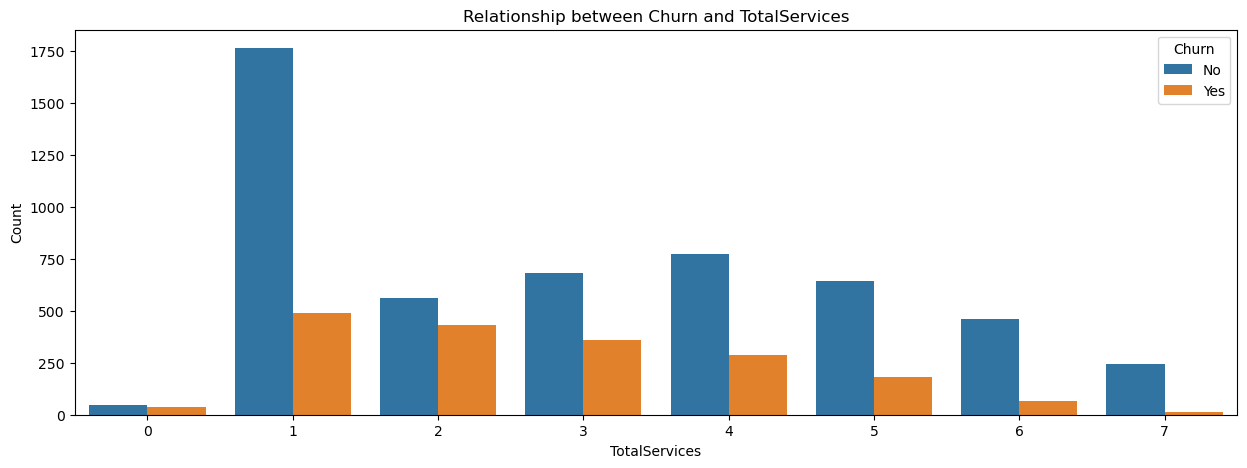

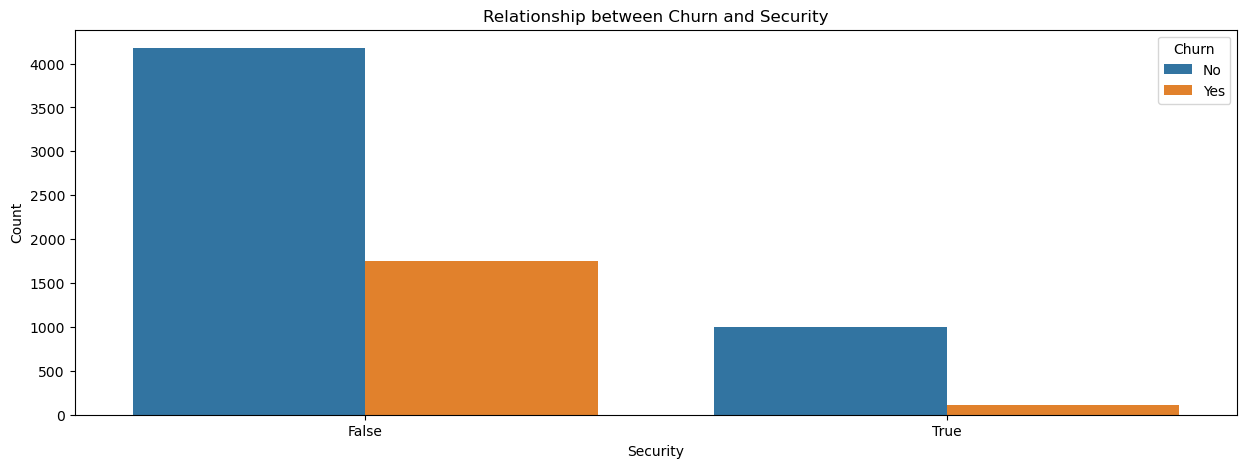

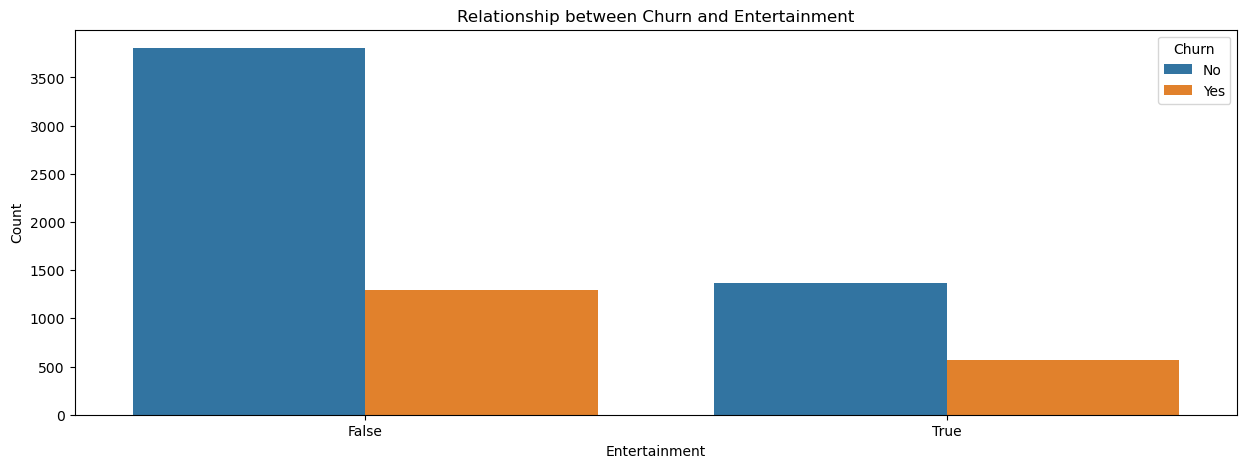

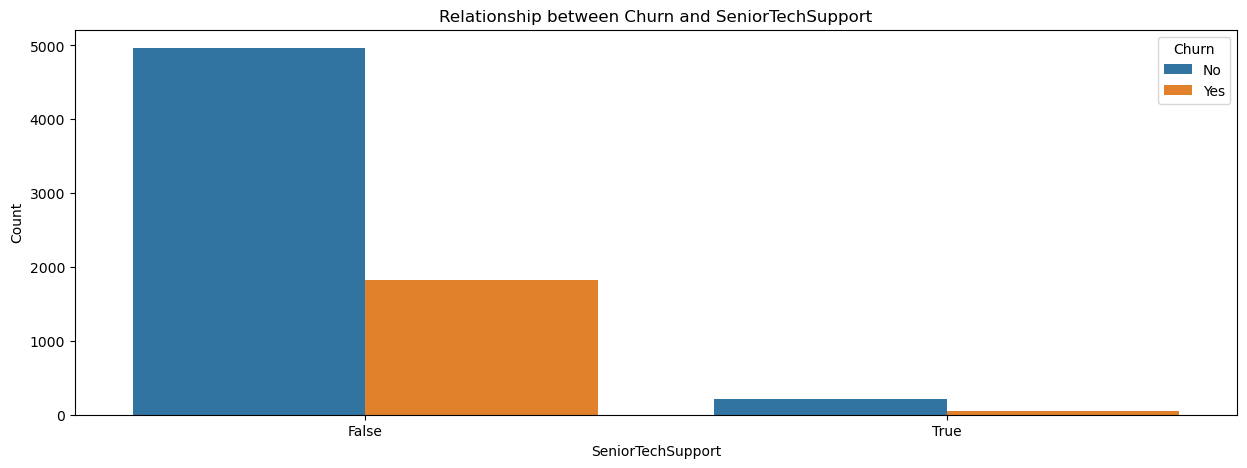

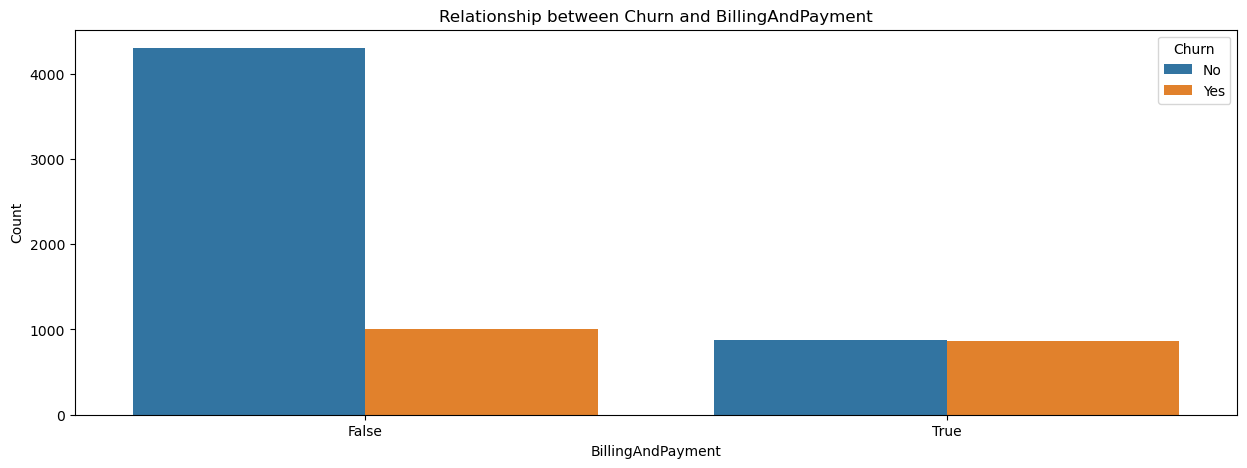

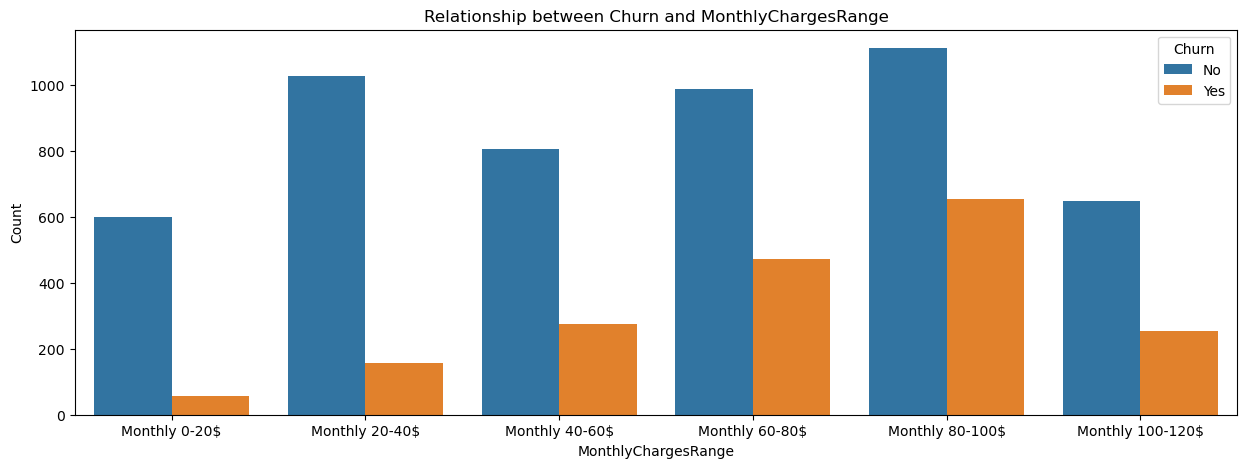

In [18]:
new_features_columns = ["TenureRange", "TotalServices", "Security", "Entertainment", 
                        "SeniorTechSupport", "BillingAndPayment", "MonthlyChargesRange"]

# Loop through each column in the column "new_features_columns"
for col in new_features_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, hue="Churn", data=implementing_data)
    plt.title(f"Relationship between Churn and {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

**Convert all values in the dataset to numerical values**

In [19]:
# Create train dataset for converting and implementing predictive models
train_data = implementing_data.copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   object  
 2   SeniorCitizen        7043 non-null   int64   
 3   Partner              7043 non-null   object  
 4   Dependents           7043 non-null   object  
 5   tenure               7043 non-null   int64   
 6   PhoneService         7043 non-null   object  
 7   MultipleLines        7043 non-null   object  
 8   InternetService      7043 non-null   object  
 9   OnlineSecurity       7043 non-null   object  
 10  OnlineBackup         7043 non-null   object  
 11  DeviceProtection     7043 non-null   object  
 12  TechSupport          7043 non-null   object  
 13  StreamingTV          7043 non-null   object  
 14  StreamingMovies      7043 non-null   object  
 15  Contract             

In [20]:
# delete not used column "customerID"
train_data.drop('customerID', axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               7043 non-null   object  
 1   SeniorCitizen        7043 non-null   int64   
 2   Partner              7043 non-null   object  
 3   Dependents           7043 non-null   object  
 4   tenure               7043 non-null   int64   
 5   PhoneService         7043 non-null   object  
 6   MultipleLines        7043 non-null   object  
 7   InternetService      7043 non-null   object  
 8   OnlineSecurity       7043 non-null   object  
 9   OnlineBackup         7043 non-null   object  
 10  DeviceProtection     7043 non-null   object  
 11  TechSupport          7043 non-null   object  
 12  StreamingTV          7043 non-null   object  
 13  StreamingMovies      7043 non-null   object  
 14  Contract             7043 non-null   object  
 15  PaperlessBilling     

In [21]:
# Convert all values into numerical term

# Convert columns that contain 2 categories
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bi_group_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 
                    'Churn', 'Security', 'Entertainment', 'SeniorTechSupport', 'BillingAndPayment']
for col in bi_group_columns:
    train_data[col] = encoder.fit_transform(train_data[col])
    
# Convert columns that contain multiple categories (more than 2 groups)
# Provide one-hot encoding method
multi_group_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaymentMethod', 'TenureRange', 'MonthlyChargesRange']
train_data = pd.get_dummies(train_data, columns=multi_group_columns, drop_first=True)

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  TotalServices                          7043 non-null   int64  
 11  Secu

### Selecting the most significant variables for implementing predictive models
we use 2 methods in order to select the most significant variables.
- Finding correlation between each variable and Churn, using heatmap
- Using Random Forest and Gradient Boosting Importance

**Heatmap, displaying correlation between each variables and Churn**

<AxesSubplot:>

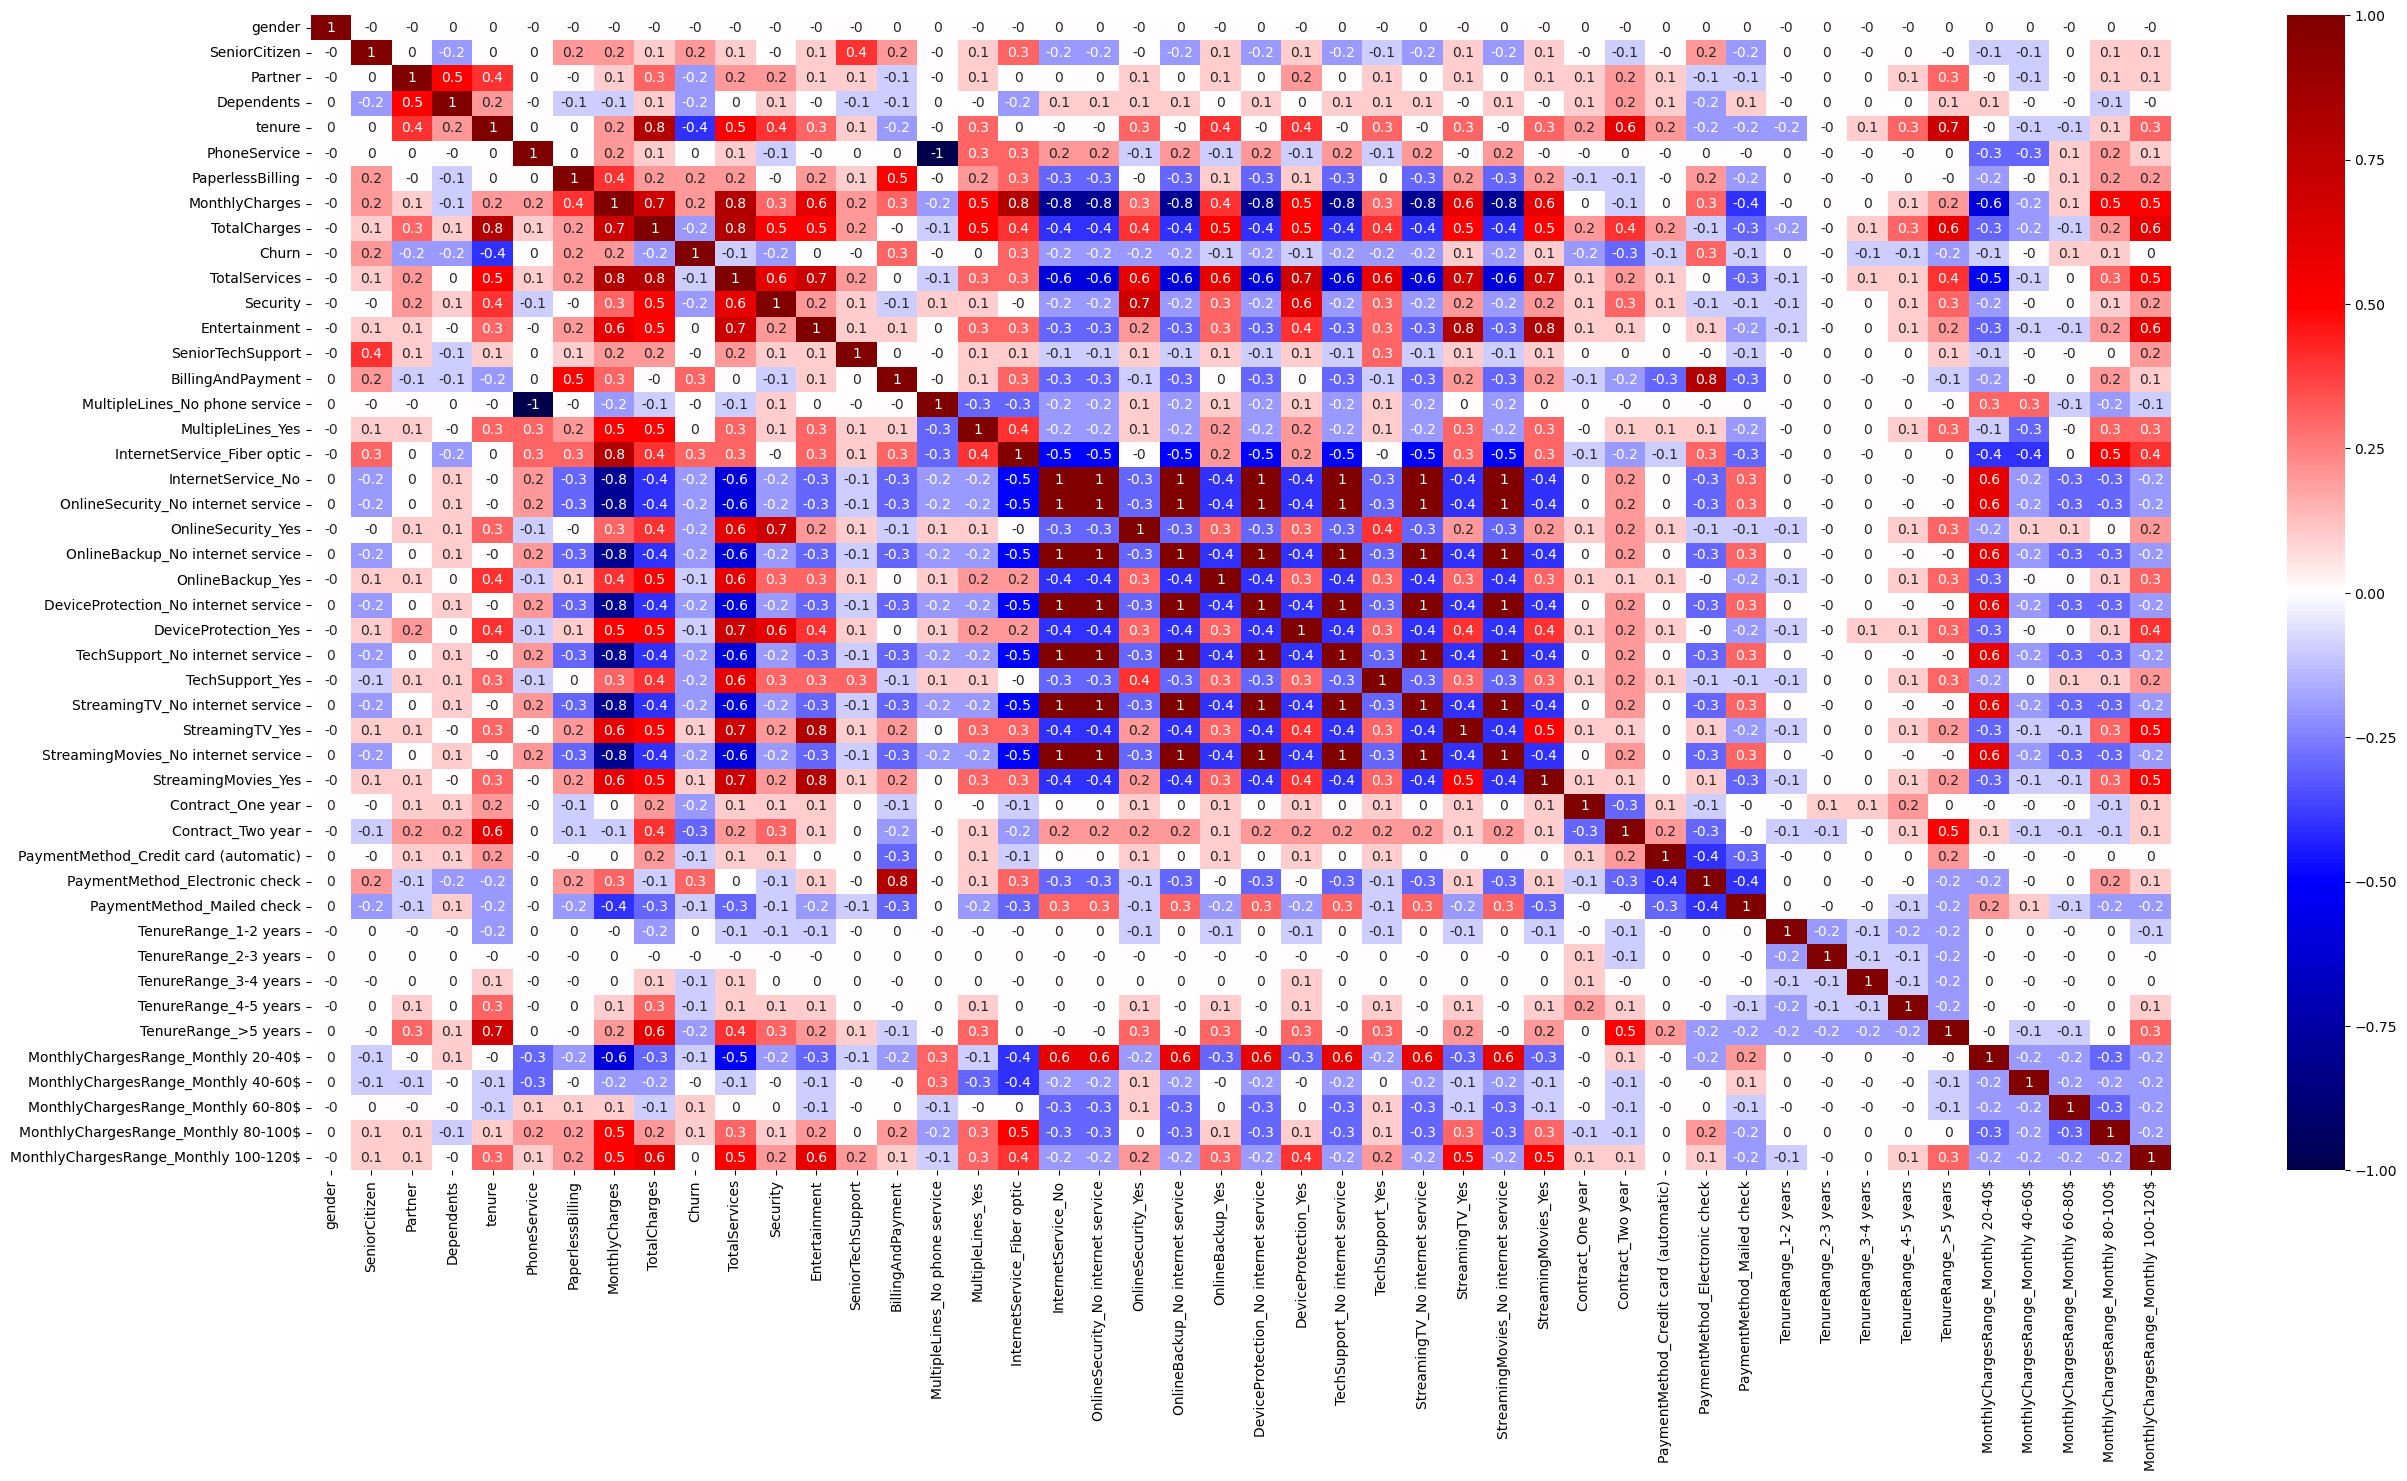

In [23]:
corr = train_data.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(round(corr, 1), annot=True, cmap='seismic')

In [24]:
churn_corr = corr['Churn'].sort_values(ascending=False)
churn_corr_table = pd.DataFrame(data=churn_corr).reset_index()
churn_corr_table.columns = ['Features', 'Correlation']
churn_corr_table

,Features,Correlation
0,Churn,1.000000
1,InternetService_Fiber optic,0.308020
2,PaymentMethod_Electronic check,0.301919
3,BillingAndPayment,0.301646
4,MonthlyCharges,0.193356
5,PaperlessBilling,0.191825
6,SeniorCitizen,0.150889
7,MonthlyChargesRange_Monthly 80-100$,0.137222
8,MonthlyChargesRange_Monthly 60-80$,0.068101
9,StreamingTV_Yes,0.063228


**Random Forest Importance**

In [25]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Split your dataset into features and target
X_RF_GB = train_data.drop('Churn', axis=1)
y_RF_GB = train_data['Churn']

# Create a Random Forest classifier
rf_class = RandomForestClassifier()

# Train the model
rf_class.fit(X_RF_GB, y_RF_GB)

# Get the feature importances
rf_imp = rf_class.feature_importances_

# Create a DataFram for rf_imp
imp_table = pd.DataFrame({"Features": X_RF_GB.columns, 
                          "Importance": rf_imp}).sort_values(by="Importance", ascending=False)
imp_table.reset_index(drop=True)

,Features,Importance
0,TotalCharges,0.167696
1,tenure,0.147317
2,MonthlyCharges,0.144166
3,InternetService_Fiber optic,0.037480
4,TotalServices,0.034553
5,PaymentMethod_Electronic check,0.029555
6,gender,0.026942
7,Contract_Two year,0.025468
8,BillingAndPayment,0.023755
9,Contract_One year,0.022830


**From the correlation and importance between Churn and each variables**

we select the significant variables for implementing predictive models by these criteria;
- The correlation is more than or equal to 0.15 and less than or equal to -0.15
- The importance is more than or equal to 0.1

Therefore, we get the significant features for predictive models as below;

In [26]:
selected_train_data = train_data[["InternetService_Fiber optic", "PaymentMethod_Electronic check", 
                                  "BillingAndPayment", "MonthlyCharges", "PaperlessBilling", "SeniorCitizen", 
                                 "Partner", "Security", "Dependents", "TechSupport_Yes", "OnlineSecurity_Yes", 
                                 "Contract_One year", "TotalCharges", "TenureRange_>5 years", "InternetService_No", 
                                 "StreamingMovies_No internet service", "StreamingTV_No internet service", 
                                 "TechSupport_No internet service", "OnlineBackup_No internet service", 
                                 "OnlineSecurity_No internet service", "DeviceProtection_No internet service", 
                                 "Contract_Two year", "tenure", "Churn"]].copy()
selected_train_data

,InternetService_Fiber optic,PaymentMethod_Electronic check,BillingAndPayment,MonthlyCharges,PaperlessBilling,SeniorCitizen,Partner,Security,Dependents,TechSupport_Yes,...,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,DeviceProtection_No internet service,Contract_Two year,tenure,Churn
0,0,1,1,29.85,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,56.95,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,34,0
2,0,0,0,53.85,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,0,0,0,42.30,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,45,0
4,1,1,1,70.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,84.80,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,24,0
7039,1,0,0,103.20,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,72,0
7040,0,1,1,29.60,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,11,0
7041,1,0,0,74.40,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,4,1


## Implementing Predictive Models
Implement predictive models as the following;
1. Decision Trees
2. Naive Bayes Classifier
3. AdaBoost Classifier
4. Multilayer Perceptron
5. Bagging along with RandomForest
6. K-nearest neighbor with Grid SearchCV
7. Logistic Regression with Grid SearchCV
8. Random Forest with Randomized SearchCV
9. Support Vector Machine with Grid SearchCV

**Standardize the variables**

In [27]:
# Import the library for normalizing the dataset
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(selected_train_data.drop('Churn', axis=1))
scaled_selected_train_data = scaler.transform(selected_train_data.drop('Churn',axis=1))

# See the dataframe after standardize the variables
table_scaled_selected_train_data = pd.DataFrame(scaled_selected_train_data, columns=selected_train_data.columns[:-1])
table_scaled_selected_train_data.head()

,InternetService_Fiber optic,PaymentMethod_Electronic check,BillingAndPayment,MonthlyCharges,PaperlessBilling,SeniorCitizen,Partner,Security,Dependents,TechSupport_Yes,...,TenureRange_>5 years,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,DeviceProtection_No internet service,Contract_Two year,tenure
0,-0.885660,1.406418,1.744435,-1.160323,0.829798,-0.439916,1.034530,-0.432769,-0.654012,-0.639439,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,-1.277445
1,-0.885660,-0.711026,-0.573251,-0.259629,-1.205113,-0.439916,-0.966622,2.310700,-0.654012,-0.639439,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,0.066327
2,-0.885660,-0.711026,-0.573251,-0.362660,0.829798,-0.439916,-0.966622,-0.432769,-0.654012,-0.639439,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,-1.236724
3,-0.885660,-0.711026,-0.573251,-0.746535,-1.205113,-0.439916,-0.966622,2.310700,-0.654012,1.563872,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,0.514251
4,1.129102,1.406418,1.744435,0.197365,0.829798,-0.439916,-0.966622,-0.432769,-0.654012,-0.639439,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,-1.236724


**Split the dataset into train and test data (we select to divide into 80% as train data, and 20% as test data)**

In [29]:
# Import the library for spliting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [30]:
X = scaled_selected_train_data
y = selected_train_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) # train 80% and test 20%

### 1. Decision Trees

In [31]:
# Import the necessary library
from sklearn.tree import DecisionTreeClassifier

# Fit the model to training data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Make predictions
dtree_predictions = dtree.predict(X_test)

# Evaluate the model
# Import the necesasry library for evalution
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score

print("The result of the decision trees model")
print("Classification report: \n", classification_report(y_test, dtree_predictions))
dtree_conf_matrix = confusion_matrix(y_test, dtree_predictions)
dtree_conf_matrix_df = pd.DataFrame(dtree_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", dtree_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, dtree_predictions))
print("Accuracy: ", accuracy_score(y_test, dtree_predictions))

The result of the decision trees model
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1041
           1       0.48      0.49      0.48       368

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          847          194
Actual 1          189          179

AUC-ROC:  0.6500268867727519
Accuracy:  0.7281760113555713


### 2. Naive Bayes Classifier

In [32]:
# Import the necessary library
from sklearn.naive_bayes import GaussianNB

# Fit the model to training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
nb_predictions = nb.predict(X_test)

# Evaluate the model
print("The result of the naive bayes classifier")
print("Classification report: \n", classification_report(y_test, nb_predictions))
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
nb_conf_matrix_df = pd.DataFrame(nb_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", nb_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))

The result of the naive bayes classifier
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.60      0.73      1041
           1       0.43      0.86      0.58       368

    accuracy                           0.67      1409
   macro avg       0.68      0.73      0.65      1409
weighted avg       0.80      0.67      0.69      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          625          416
Actual 1           51          317

AUC-ROC:  0.7308986446978241
Accuracy:  0.6685592618878637


### 3. AdaBoost Classifier

In [33]:
# Import the necessary library
from sklearn.ensemble import AdaBoostClassifier

# Fit the model to training data
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

# Make predictions
ab_predictions = ab.predict(X_test)

# Evaluate the model
print("The result of the adaboost classifier")
print("Classification report: \n", classification_report(y_test, ab_predictions))
ab_conf_matrix = confusion_matrix(y_test, ab_predictions)
ab_conf_matrix_df = pd.DataFrame(ab_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", ab_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, ab_predictions))
print("Accuracy: ", accuracy_score(y_test, ab_predictions))

The result of the adaboost classifier
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.62      0.54      0.58       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          919          122
Actual 1          170          198

AUC-ROC:  0.7104242367288978
Accuracy:  0.7927608232789212


### 4. Multilayer Perceptron

In [34]:
# Import the necessary library
from sklearn.neural_network import MLPClassifier

# Fit the MLP classifier to training data (set max iteration = 500)
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train, y_train)

# Make predictions
mlp_predictions = mlp.predict(X_test)

# Evaluate the model
print("The result of the multilayer perceptron")
print("Classification report: \n", classification_report(y_test, mlp_predictions))
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)
mlp_conf_matrix_df = pd.DataFrame(mlp_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", mlp_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, mlp_predictions))
print("Accuracy: ", accuracy_score(y_test, mlp_predictions))

The result of the multilayer perceptron
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1041
           1       0.60      0.56      0.58       368

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          904          137
Actual 1          162          206

AUC-ROC:  0.7140891909952806
Accuracy:  0.7877927608232789


### 5. Bagging along with RandomForest

In [35]:
# Import the necessary library
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Define the base classifier to use in the bagging ensemble
base_clf = RandomForestClassifier(n_estimators=100)

# Define the bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=10)

# Fit the model to training data
bagging_clf.fit(X_train, y_train)

# Make predictions
bg_rf_predictions = bagging_clf.predict(X_test)

# Evaluate the model
print("The result of the bagging along with random forest")
print("Classification report: \n", classification_report(y_test, bg_rf_predictions))
bg_rf_conf_matrix = confusion_matrix(y_test, bg_rf_predictions)
bg_rf_conf_matrix_df = pd.DataFrame(bg_rf_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", bg_rf_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, bg_rf_predictions))
print("Accuracy: ", accuracy_score(y_test, bg_rf_predictions))

The result of the bagging along with random forest
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          933          108
Actual 1          178          190

AUC-ROC:  0.7062789750657812
Accuracy:  0.7970191625266146


### 6. K-nearest neighbor with Grid SearchCV

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

Text(0, 0.5, 'Error Rate')

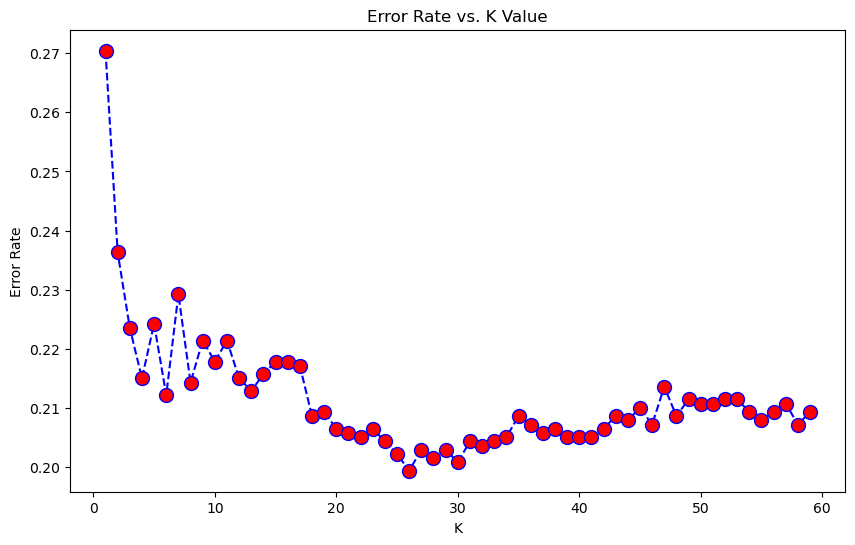

In [36]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Choose the best k
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot graph to see the k trend
plt.figure(figsize=(10,6))
plt.plot(range(1,60), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above chart, we can see that at k>41, the error rate tends to be around 0.215-0.225. Then, we select k=41

In [37]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Define a dictionary of hyperparameters
knn_param_grid = {'n_neighbors': [6, 16, 21, 41], 
                  'weights': ['uniform', 'distance'], 
                  'p': [1, 2]}

# Create a GridSearchCV object
knn_grid_search = GridSearchCV(knn, param_grid=knn_param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
knn_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_
print("The best parameter: ", knn_best_params)
print("The best score: ", knn_best_params)

# Fit the KNN model with the best parameters
knn_best = KNeighborsClassifier(n_neighbors=knn_best_params['n_neighbors'], 
                                weights=knn_best_params['weights'], 
                                p=knn_best_params['p'])
knn_best.fit(X_train, y_train)

# Predict on the test data using the best model
knn_gridSearch_predictions = knn_best.predict(X_test)

# Evaluate the model
print("\nThe result of the KNN classifier with grid search CV")
print("Classification report: \n", classification_report(y_test, knn_gridSearch_predictions))
knn_gridSearch_conf_matrix = confusion_matrix(y_test, knn_gridSearch_predictions)
knn_gridSearch_conf_matrix_df = pd.DataFrame(knn_gridSearch_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", knn_gridSearch_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, knn_gridSearch_predictions))
print("Accuracy: ", accuracy_score(y_test, knn_gridSearch_predictions))

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

The best parameter:  {'n_neighbors': 41, 'p': 1, 'weights': 'uniform'}
The best score:  {'n_neighbors': 41, 'p': 1, 'weights': 'uniform'}

The result of the KNN classifier with grid search CV
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1041
           1       0.62      0.57      0.59       368

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          912          129
Actual 1          159          209

AUC-ROC:  0.7220077371256736
Accuracy:  0.7955997161107168


/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 7. Logistic Regression with Grid SearchCV

In [38]:
# import the necessary library
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
log_reg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create a logistic regression object
log_reg = LogisticRegression()

# Create a GridSearchCV object
log_reg_grid_search = GridSearchCV(log_reg, param_grid=log_reg_param_grid, scoring='accuracy')

# Fit the GridSearchCV object to the training data
log_reg_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
log_reg_best_params = log_reg_grid_search.best_params_
log_reg_best_score = log_reg_grid_search.best_score_
print("The best parameter: ", log_reg_best_params)
print("The best score: ", log_reg_best_score)

# Fit the logistic regression with the best parameters
log_reg_best = LogisticRegression(C=log_reg_best_params['C'], penalty=log_reg_best_params['penalty'])
log_reg_best.fit(X_train, y_train)

# Predict on the test data using the best model
log_reg_gridSearch_predictions = log_reg_best.predict(X_test)

# Evaluate the model
print("\nThe result of the logistic regression with grid search CV")
print("Classification report: \n", classification_report(y_test, log_reg_gridSearch_predictions))
log_reg_gridSearch_conf_matrix = confusion_matrix(y_test, log_reg_gridSearch_predictions)
log_reg_gridSearch_conf_matrix_df = pd.DataFrame(log_reg_gridSearch_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", log_reg_gridSearch_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, log_reg_gridSearch_predictions))
print("Accuracy: ", accuracy_score(y_test, log_reg_gridSearch_predictions))

The best parameter:  {'C': 10, 'penalty': 'l2'}
The best score:  0.8012088239419638

The result of the logistic regression with grid search CV
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.63      0.54      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          925          116
Actual 1          169          199

AUC-ROC:  0.7146647767614751
Accuracy:  0.7977288857345636


/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/thanapoomphatthanaphan/opt/anaconda3/l

### 8. Random Forest with Randomized SearchCV

In [39]:
# import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
rf_param_dist = {'n_estimators': [100, 200, 300]}

# Create a random forest object
rf = RandomForestClassifier()

# Create a RandomSearchCV object
rf_random_search = RandomizedSearchCV(rf, 
                                      param_distributions=rf_param_dist, 
                                      n_iter=100, 
                                      cv=10, 
                                      scoring='accuracy')

# Fit the RandomSearchCV object to the training data
rf_random_search.fit(X_train, y_train)

# Get the best parameters and the best score
rf_best_params = rf_random_search.best_params_
rf_best_score = rf_random_search.best_score_
print("The best parameter: ", rf_best_params)
print("The best score: ", rf_best_score)

# Fit the random forest with the best parameters
rf_best = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'])
rf_best.fit(X_train, y_train)

# Predict on the test data using the best model
rf_randomSearch_predictions = rf_best.predict(X_test)

# Evaluate the model
print("\nThe result of the random forest with random search CV")
print("Classification report: \n", classification_report(y_test, rf_randomSearch_predictions))
rf_randomSearch_conf_matrix = confusion_matrix(y_test, rf_randomSearch_predictions)
rf_randomSearch_conf_matrix_df = pd.DataFrame(rf_randomSearch_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", rf_randomSearch_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, rf_randomSearch_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_randomSearch_predictions))

/Users/thanapoomphatthanaphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best parameter:  {'n_estimators': 300}
The best score:  0.7836318859201591

The result of the random forest with random search CV
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.50      0.55       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          922          119
Actual 1          185          183

AUC-ROC:  0.6914847241364908
Accuracy:  0.7842441447835344


### 9. Support Vector Machine with Grid SearchCV

In [40]:
# Import the necessary library
from sklearn.svm import SVC

# Define the parameter grid
svm_param_grid = {'C': [0.1, 1, 10, 100]}

# Create a support vector machine object
svm = SVC()

# Create a GridSearchCV object
svm_grid_search = GridSearchCV(svm, param_grid=svm_param_grid, scoring='accuracy')

# Fit the GridSearchCV object to the training data
svm_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_
print("The best parameter: ", svm_best_params)
print("The best score: ", svm_best_score)

# Fit the support vector machine with the best parameters
svm_best = SVC(C=svm_best_params['C'])
svm_best.fit(X_train, y_train)

# Predict on the test data using the best model
svm_gridSearch_predictions = svm_best.predict(X_test)

# Evaluate the model
print("\nThe result of the support vector machine with grid search CV")
print("Classification report: \n", classification_report(y_test, svm_gridSearch_predictions))
svm_gridSearch_conf_matrix = confusion_matrix(y_test, svm_gridSearch_predictions)
svm_gridSearch_conf_matrix_df = pd.DataFrame(svm_gridSearch_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", svm_gridSearch_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, svm_gridSearch_predictions))
print("Accuracy: ", accuracy_score(y_test, svm_gridSearch_predictions))

The best parameter:  {'C': 1}
The best score:  0.7967719515020464

The result of the support vector machine with grid search CV
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.50      0.56       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          937          104
Actual 1          184          184

AUC-ROC:  0.7000480307396734
Accuracy:  0.7955997161107168


## Summary

**Create the result table to display the performance of each model**

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

result_table = {'Machine Learning Models': ['Decision Tree',
                                          'Naive Bayes Classifier', 
                                          'AdaBoost Classifier', 
                                          'Multilayer Perceptron', 
                                          'Bagging along with RandomForest', 
                                          'K-nearest neighbor with Grid SearchCV', 
                                          'Logistic Regression with Grid SearchCV', 
                                          'Random Forest with Randomized SearchCV', 
                                          'Support Vector Machine with Grid SearchCV'], 
                'Accuracy': [accuracy_score(y_test, dtree_predictions), 
                             accuracy_score(y_test, nb_predictions), 
                             accuracy_score(y_test, ab_predictions),
                             accuracy_score(y_test, mlp_predictions),
                             accuracy_score(y_test, bg_rf_predictions), 
                             accuracy_score(y_test, knn_gridSearch_predictions), 
                             accuracy_score(y_test, log_reg_gridSearch_predictions),
                             accuracy_score(y_test, rf_randomSearch_predictions),
                             accuracy_score(y_test, svm_gridSearch_predictions)],
                 'AUC-ROC': [roc_auc_score(y_test, dtree_predictions), 
                             roc_auc_score(y_test, nb_predictions), 
                             roc_auc_score(y_test, ab_predictions),
                             roc_auc_score(y_test, mlp_predictions),
                             roc_auc_score(y_test, bg_rf_predictions), 
                             roc_auc_score(y_test, knn_gridSearch_predictions), 
                             roc_auc_score(y_test, log_reg_gridSearch_predictions), 
                             roc_auc_score(y_test, rf_randomSearch_predictions), 
                             roc_auc_score(y_test, svm_gridSearch_predictions)], 
                 'Precision': [precision_score(y_test, dtree_predictions), 
                               precision_score(y_test, nb_predictions), 
                               precision_score(y_test, ab_predictions),
                               precision_score(y_test, mlp_predictions),
                               precision_score(y_test, bg_rf_predictions), 
                               precision_score(y_test, knn_gridSearch_predictions), 
                               precision_score(y_test, log_reg_gridSearch_predictions), 
                               precision_score(y_test, rf_randomSearch_predictions), 
                               precision_score(y_test, svm_gridSearch_predictions)], 
                 'Recall': [recall_score(y_test, dtree_predictions), 
                            recall_score(y_test, nb_predictions), 
                            recall_score(y_test, ab_predictions),
                            recall_score(y_test, mlp_predictions),
                            recall_score(y_test, bg_rf_predictions), 
                            recall_score(y_test, knn_gridSearch_predictions), 
                            recall_score(y_test, log_reg_gridSearch_predictions), 
                            recall_score(y_test, rf_randomSearch_predictions), 
                            recall_score(y_test, svm_gridSearch_predictions)], 
                 'F1-Score': [f1_score(y_test, dtree_predictions), 
                              f1_score(y_test, nb_predictions), 
                              f1_score(y_test, ab_predictions),
                              f1_score(y_test, mlp_predictions),
                              f1_score(y_test, bg_rf_predictions), 
                              f1_score(y_test, knn_gridSearch_predictions), 
                              f1_score(y_test, log_reg_gridSearch_predictions), 
                              f1_score(y_test, rf_randomSearch_predictions), 
                              f1_score(y_test, svm_gridSearch_predictions)]}

result_df = pd.DataFrame(data=result_table)
sorted_result_df = result_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
sorted_result_df

,Machine Learning Models,Accuracy,AUC-ROC,Precision,Recall,F1-Score
0,Logistic Regression with Grid SearchCV,0.797729,0.714665,0.631746,0.540761,0.582723
1,Bagging along with RandomForest,0.797019,0.706279,0.637584,0.516304,0.570571
2,K-nearest neighbor with Grid SearchCV,0.795600,0.722008,0.618343,0.567935,0.592068
3,Support Vector Machine with Grid SearchCV,0.795600,0.700048,0.638889,0.500000,0.560976
4,AdaBoost Classifier,0.792761,0.710424,0.618750,0.538043,0.575581
5,Multilayer Perceptron,0.787793,0.714089,0.600583,0.559783,0.579466
6,Random Forest with Randomized SearchCV,0.784244,0.691485,0.605960,0.497283,0.546269
7,Decision Tree,0.728176,0.650027,0.479893,0.486413,0.483131
8,Naive Bayes Classifier,0.668559,0.730899,0.432469,0.861413,0.575840


**Create the bar charts to display the accuracy of each model for easier to visualize than the result table**

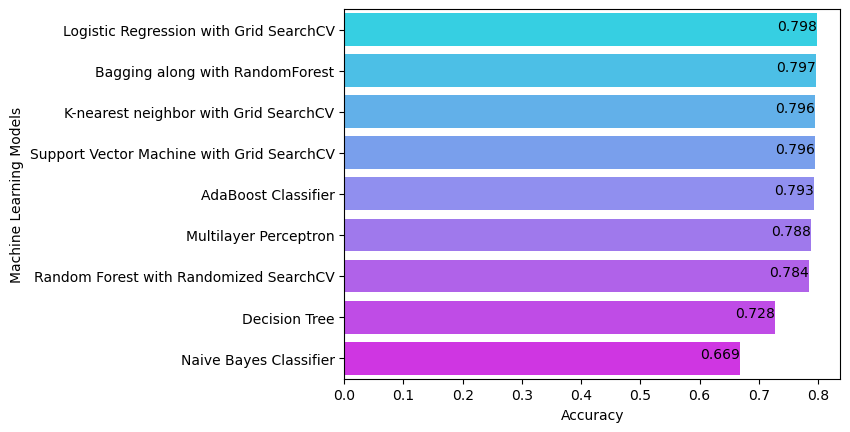

In [107]:
result_graph = sns.barplot(x='Accuracy', 
                           y='Machine Learning Models', 
                           data=sorted_result_df, 
                           palette='cool'
                          )

# Add values on the bar charts
for index, row in sorted_result_df.iterrows():
    result_graph.text(row['Accuracy'], index, "{:.3f}".format(row['Accuracy']), color='black', ha='right')

In conclusion, our study aimed to develop a classification model for predicting customer churn in a telecommunications company's service. After implementing nine different machine learning models and evaluating their performance, **we have identified that Logistic Regression with Grid Search CV provided the best accuracy of 79.8% for churn predictions**. While other models also showed good performance ranging between 78.4% to 79.7%, their results were slightly lower than Logistic Regression with Grid Search CV. On the other hand, Decision Tree and Naive Bayes Classifier displayed the lowest accuracy among the models with only 72.8% and 66.9%, respectively. Therefore, we recommend using Logistic Regression with Grid Search CV for predicting customer churn in this case.